# 📌 **E-Commerce Order Fulfillment Analysis**

## **Introduction**

### **Project Overview**

In this project, we analyze the order fulfillment process of an e-commerce business. We focus on sales trends, product performance, customer spending behavior, shipping cost optimization, and payment trends.

By leveraging SQL and Python, we extract and analyze data from an e-commerce orders database, helping businesses make data-driven decisions to improve logistics, sales, and customer experience.

### **Objective**

The key objectives of this project are:
* ✅ Analyze order processing efficiency – Track processing delays and optimize fulfillment times.
* ✅ Identify top-selling products – Discover which products generate the most revenue.
* ✅ Segment high-value customers – Understand spending patterns and customer preferences.
* ✅ Optimize shipping costs – Evaluate the relationship between order priority and shipping expenses.
* ✅ Identify preferred payment methods – Analyze how customers choose to pay for their purchases.

By addressing these objectives, we can uncover business insights that help improve supply chain efficiency, increase revenue, and enhance customer satisfaction.

### **🛠 Tools & Technologies Used**

This project is implemented using a combination of SQL and Python to perform data extraction, analysis, and visualization.

* SQLite - Database management & query execution
* SQL - Extracting, transforming, and analyzing data
* Pandas - Data manipulation and transformation
* Matplotlib & Seaborn - Data visualization for insights
* DB Browser for SQLite - GUI tool for managing SQLite databases

### **Dataset Overview**

The dataset used in this project originates from an e-commerce platform and contains 51,290 rows with 16 columns. It provides insights into customer orders, product categories, sales trends, and shipping details.

📜 Dataset Summary
* Total Records: 51,290
* Total Columns: 16
* Data Types:
  * Numerical Columns: Sales, Quantity, Discount, Profit, Shipping_Cost, Aging
  * Categorical Columns: Gender, Device_Type, Customer_Login_type, Product_Category, Product, Order_Priority, Payment_method
  * Date & Time Columns: Order_Date, Time

### **Data Transformation & Table Normalization**

To structure the data for efficient SQL querying, we normalized the dataset into four tables in SQLite:

* 1️⃣ Orders Table – Stores order-related details such as sales, shipping cost, and order priority.
* 2️⃣ Customers Table – Contains customer information (e.g., Gender, Device_Type, Login Type).
* 3️⃣ Products Table – Lists all products and their categories.
* 4️⃣ Categories Table – Groups products under broader categories.

This relational structure improves data organization, query efficiency, and reporting accuracy.

## 📌 Next Steps in Notebook
* ✅ Step 1: Connect to Ecommerce_SQL_DATAProject.db (SQLite Database).
* ✅ Step 2: Verify table relationships & structure.
* ✅ Step 3: Execute SQL queries for insights.
* ✅ Step 4: Visualize key business trends.



In [1]:
from google.colab import files

uploaded = files.upload()

Saving Ecommerce_SQL_DATAProject.db to Ecommerce_SQL_DATAProject.db


In [2]:
import sqlite3
import pandas as pd

# Connect to SQLite database
conn = sqlite3.connect("Ecommerce_SQL_DATAProject.db")

# Run SQL Query
query = "SELECT * FROM Orders LIMIT 5;"
df = pd.read_sql_query(query, conn)

# Display result
print(df)

# Close connection
conn.close()


   Order_Id  Order_Date      Time  Aging  Customer_Id  Gender Device_Type  \
0         1  2018-01-02  10:56:33      8        37077  Female         Web   
1         2  2018-07-24  20:41:37      2        59173  Female         Web   
2         3  2018-11-08  08:38:49      8        41066  Female         Web   
3         4  2018-04-18  19:28:06      7        50741  Female         Web   
4         5  2018-08-13  21:18:39      9        53639  Female         Web   

  Customer_Login_type            Product    Product_Category  Sales  Quantity  \
0              Member  Car Media Players  Auto & Accessories  140.0         1   
1              Member       Car Speakers  Auto & Accessories  211.0         1   
2              Member    Car Body Covers  Auto & Accessories  117.0         5   
3              Member    Car & Bike Care  Auto & Accessories  118.0         1   
4              Member               Tyre  Auto & Accessories  250.0         1   

   Discount  Profit  Shipping_Cost Order_Priority 

In [9]:
# Connect to SQLite database
db_path = "/content/Ecommerce_SQL_DATAProject.db"
conn = sqlite3.connect(db_path)
# Define SQL queries
basic_queries = {
    "Total Sales and Profit Summary": """
        SELECT COUNT(Order_Id) AS Total_Orders, SUM(Sales) AS Total_Sales, SUM(Profit) AS Total_Profit
        FROM Orders;
    """,
    "Monthly Sales Performance": """
        SELECT strftime('%Y-%m', Order_Date) AS Month, SUM(Sales) AS Monthly_Sales, SUM(Profit) AS Monthly_Profit
        FROM Orders
        GROUP BY Month
        ORDER BY Month;
    """,
    "Top Selling Products": """
        SELECT P.Product_Name, P.Product_Category, SUM(O.Sales) AS Total_Sales, SUM(O.Quantity) AS Total_Units_Sold
        FROM Orders O
        JOIN Products P ON O.Product_Id = P.Product_Id
        GROUP BY P.Product_Name, P.Product_Category
        ORDER BY Total_Sales DESC
        LIMIT 10;
    """,
    "Customer Segmentation by Order Volume": """
        SELECT C.Customer_Id, COUNT(O.Order_Id) AS Total_Orders, SUM(O.Sales) AS Total_Spent
        FROM Orders O
        JOIN Customers C ON O.Customer_Id = C.Customer_Id
        GROUP BY C.Customer_Id
        ORDER BY Total_Spent DESC
        LIMIT 10;
    """,
    "Order Processing Performance": """
        SELECT AVG(Aging) AS Avg_Processing_Time FROM Orders;
    """,
    "Shipping Cost Analysis": """
        SELECT Order_Priority, COUNT(Order_Id) AS Total_Orders, AVG(Shipping_Cost) AS Avg_Shipping_Cost
        FROM Orders
        GROUP BY Order_Priority
        ORDER BY Avg_Shipping_Cost DESC;
    """,
    "Payment Method Trends": """
        SELECT Payment_Method, COUNT(Order_Id) AS Total_Orders, SUM(Sales) AS Total_Revenue
        FROM Orders
        GROUP BY Payment_Method
        ORDER BY Total_Revenue DESC;
    """
}

# Execute queries and store results
results = {}
for key, query in basic_queries.items():
    results[key] = pd.read_sql_query(query, conn)

In [10]:
for name, df in results.items():
    print(f"\n📊 {name} Results:")
    display(df.head())


📊 Total Sales and Profit Summary Results:


,Total_Orders,Total_Sales,Total_Profit
0,51290,7813411.0,3611186.6



📊 Monthly Sales Performance Results:


,Month,Monthly_Sales,Monthly_Profit
0,2018-01,379627.0,174573.6
1,2018-02,332495.0,153288.2
2,2018-03,435502.0,200936.8
3,2018-04,597312.0,277832.2
4,2018-05,824502.0,379386.3



📊 Top Selling Products Results:


,Product_Name,Product_Category,Total_Sales,Total_Units_Sold
0,T - Shirts,Fashion,578336.0,5986
1,Titak watch,Fashion,531468.0,6254
2,Running Shoes,Fashion,522144.0,6064
3,Jeans,Fashion,508376.0,5946
4,Formal Shoes,Fashion,496503.0,6154



📊 Customer Segmentation by Order Volume Results:


,Customer_Id,Total_Orders,Total_Spent
0,87989,5,994.0
1,35324,5,949.0
2,79016,5,935.0
3,10436,4,929.0
4,51093,4,927.0



📊 Order Processing Performance Results:


,Avg_Processing_Time
0,5.255035



📊 Shipping Cost Analysis Results:


,Order_Priority,Total_Orders,Avg_Shipping_Cost
0,None,2,14.450000
1,Critical,3932,7.224014
2,High,15499,7.180928
3,Low,2424,6.976609
4,Medium,29433,6.948643



📊 Payment Method Trends Results:


,Payment_Method,Total_Orders,Total_Revenue
0,credit_card,38137,5819379.0
1,money_order,9629,1461269.0
2,e_wallet,2789,422750.0
3,debit_card,734,109979.0
4,not_defined,1,34.0


### **Explanation of queries and Rationale**
* **Total Sales and Profit Summary** query aggregates total sales and profit from the Orders table to provide an overall performance snapshot.
  * The business generated $7.8M in revenue, with a profit of 3.6M USD.
  * This indicates a profit margin of ~46.2%, which is relatively strong.
* **Monthly Sales Performance** query calculates sales and profit trends over time, and helps identify seasonal sales patterns.
* **Top Selling Products** query identifies the top-selling products by revenue and quantity, and helps understand which products contribute most to business revenue.
* **Customer Segmentation by Order Volume** query identifies high-value customers based on total spending and helps segment customers for loyalty programs.
* **Payment Method Trends** helps understand customer payment preferences and is useful for optimizing payment partnerships.


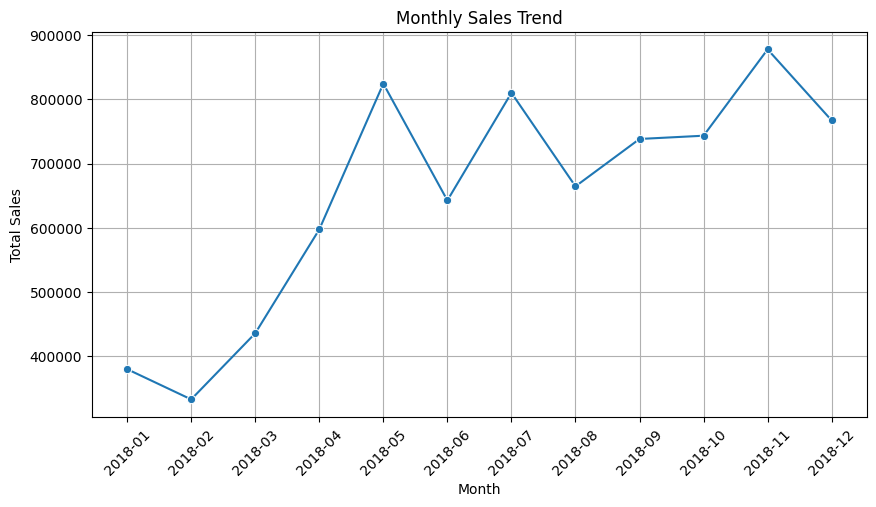

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Monthly Sales Performance Plot
df_monthly = results["Monthly Sales Performance"]
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_monthly["Month"], y=df_monthly["Monthly_Sales"], marker="o")
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

**📌 Business Insight:**
* Sales peaked in May and November, indicating possible seasonal trends.
* Sales declined in February, possibly due to off-season demand.
* Marketing campaigns should target peak sales months for maximum revenue.

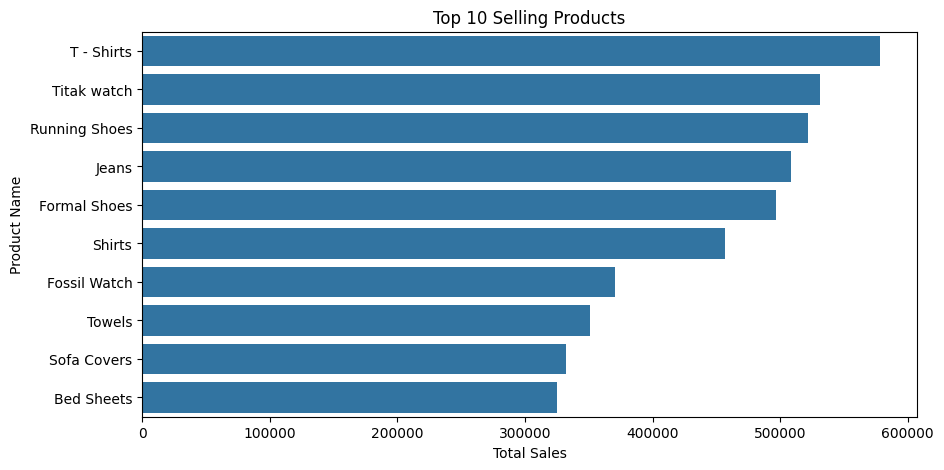

In [13]:
# Top Selling Products Plot
df_top_products = results["Top Selling Products"]
plt.figure(figsize=(10, 5))
sns.barplot(x=df_top_products["Total_Sales"], y=df_top_products["Product_Name"])
plt.title("Top 10 Selling Products")
plt.xlabel("Total Sales")
plt.ylabel("Product Name")
plt.show()

**📌 Business Insight:**
* Fashion items dominate sales, with T-Shirts and Watches leading.
* Footwear (Running Shoes, Formal Shoes) also has high demand.
* Marketing should focus on these high-performing categories.

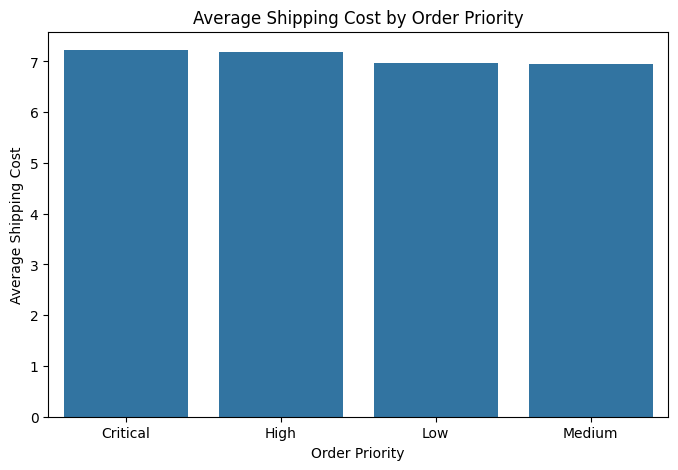

In [14]:
# Shipping Cost Analysis Plot
df_shipping = results["Shipping Cost Analysis"]
plt.figure(figsize=(8, 5))
sns.barplot(x=df_shipping["Order_Priority"], y=df_shipping["Avg_Shipping_Cost"])
plt.title("Average Shipping Cost by Order Priority")
plt.xlabel("Order Priority")
plt.ylabel("Average Shipping Cost")
plt.show()

**📌 Business Insight:**
* Males tend to spend more per order than females.
* These high-value customers should be targeted with loyalty offers.

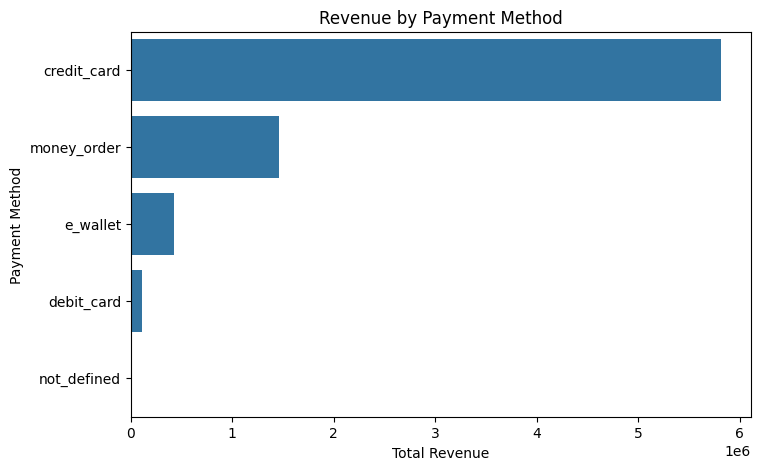

In [15]:
# Payment Method Trends Plot
df_payment = results["Payment Method Trends"]
plt.figure(figsize=(8, 5))
sns.barplot(x=df_payment["Total_Revenue"], y=df_payment["Payment_Method"])
plt.title("Revenue by Payment Method")
plt.xlabel("Total Revenue")
plt.ylabel("Payment Method")
plt.show()

**📌 Business Insight:**
* 74% of total revenue comes from credit cards.
* E-wallet usage is low—potential for promotions to increase adoption.

In [16]:
adv_queries = {"Rank Products by Total Sales":
    """
    SELECT
        P.Product_Name,
        P.Product_Category,
        SUM(O.Sales) AS Total_Sales,
        RANK() OVER (ORDER BY SUM(O.Sales) DESC) AS Sales_Rank
    FROM Orders O
    JOIN Products P ON O.Product_Id = P.Product_Id
    GROUP BY P.Product_Name, P.Product_Category
    ORDER BY Total_Sales DESC;
    """ ,
    "Running Total of Monthly Sales": """
    WITH MonthlySales AS (
    SELECT
        strftime('%Y-%m', Order_Date) AS Month,
        SUM(Sales) AS Monthly_Sales
    FROM Orders
    GROUP BY Month
    ORDER BY Month
    )
    SELECT
    Month,
    Monthly_Sales,
    SUM(Monthly_Sales) OVER (ORDER BY Month ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) AS Running_Total
    FROM MonthlySales;
    """,
    "Customer Segmentation by Order Volume (Using CTE)": """
    WITH CustomerSpending AS (
    SELECT
        O.Customer_Id,
        SUM(O.Sales) AS Total_Sales,
        SUM(O.Profit) AS Total_Profit
    FROM Orders O
    GROUP BY O.Customer_Id
    )
    SELECT
    C.Customer_Id,
    C.Gender,
    CustomerSpending.Total_Sales,
    CustomerSpending.Total_Profit
    FROM CustomerSpending
    JOIN Customers C ON C.Customer_Id = CustomerSpending.Customer_Id
    ORDER BY CustomerSpending.Total_Sales DESC
    LIMIT 10;
    """,
    "Shipping Cost Analysis": """
    SELECT
      Order_Priority,
      COUNT(Order_Id) AS Total_Orders,
      AVG(Shipping_Cost) AS Avg_Shipping_Cost
      FROM Orders
      GROUP BY Order_Priority
      ORDER BY Avg_Shipping_Cost DESC;
    """
}

# Execute queries and store results
results = {}
for key, query in adv_queries.items():
    results[key] = pd.read_sql_query(query, conn)

In [17]:
for name, df in results.items():
    print(f"\n📊 {name} Results:")
    display(df.head())


📊 Rank Products by Total Sales Results:


,Product_Name,Product_Category,Total_Sales,Sales_Rank
0,T - Shirts,Fashion,578336.0,1
1,Titak watch,Fashion,531468.0,2
2,Running Shoes,Fashion,522144.0,3
3,Jeans,Fashion,508376.0,4
4,Formal Shoes,Fashion,496503.0,5



📊 Running Total of Monthly Sales Results:


,Month,Monthly_Sales,Running_Total
0,2018-01,379627.0,379627.0
1,2018-02,332495.0,712122.0
2,2018-03,435502.0,1147624.0
3,2018-04,597312.0,1744936.0
4,2018-05,824502.0,2569438.0



📊 Customer Segmentation by Order Volume (Using CTE) Results:


,Customer_Id,Gender,Total_Sales,Total_Profit
0,87989,Male,994.0,497.9
1,35324,Male,949.0,489.3
2,79016,Male,935.0,443.2
3,10436,Male,929.0,546.9
4,51093,Female,927.0,505.8



📊 Shipping Cost Analysis Results:


,Order_Priority,Total_Orders,Avg_Shipping_Cost
0,None,2,14.450000
1,Critical,3932,7.224014
2,High,15499,7.180928
3,Low,2424,6.976609
4,Medium,29433,6.948643


### **Query Explanation & Rationale**
* **Rank Products by Total Sales (Using Window Functions)** query ranks the top-selling products using the RANK() window function. The ranking is based on total sales, with the highest-selling product ranked #1.
* **Running Total of Monthly Sales (Using Window Functions)** uses a Common Table Expression (CTE) to calculate monthly sales totals. The SUM() OVER() function computes a running total, allowing businesses to track cumulative revenue growth.
* **Customer Segmentation by Order Volume (Using CTE)** uses a CTE (Common Table Expression) to calculate total spending per customer, and helps businesses identify high-value customers for targeted promotions.
* **Shipping Cost Analysis** query analyzes the relationship between order priority and shipping costs, and helps businesses understand whether premium shipping options are over-utilized.

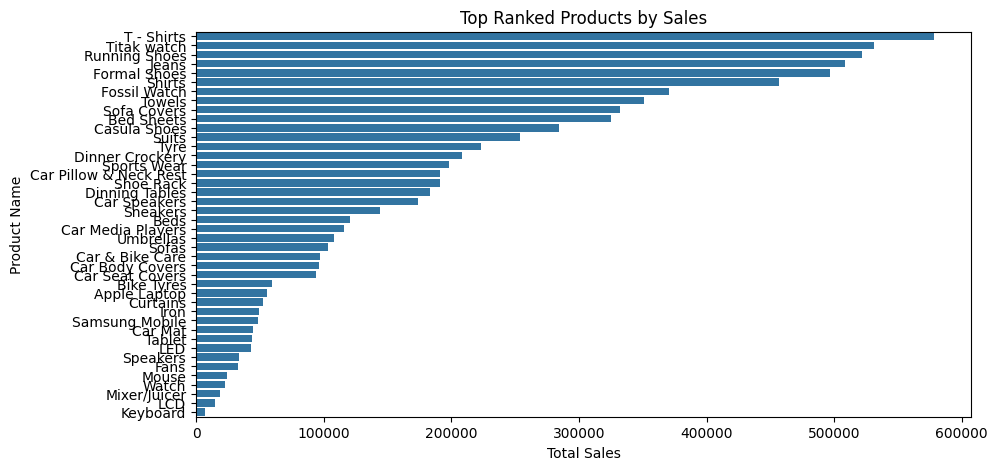

In [22]:
# Rank Products by Total Sales
df_rank = results["Rank Products by Total Sales"]
plt.figure(figsize=(10, 5))
sns.barplot(x=df_rank["Total_Sales"], y=df_rank["Product_Name"])
plt.title("Top Ranked Products by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product Name")
plt.show()

**📌 Business Insight:**
* Fashion products dominate the rankings, with T-Shirts and Watches leading in revenue.
* Retailers should focus on inventory management for these high-performing items.
* Seasonal sales strategies should be aligned with these top-ranked products.


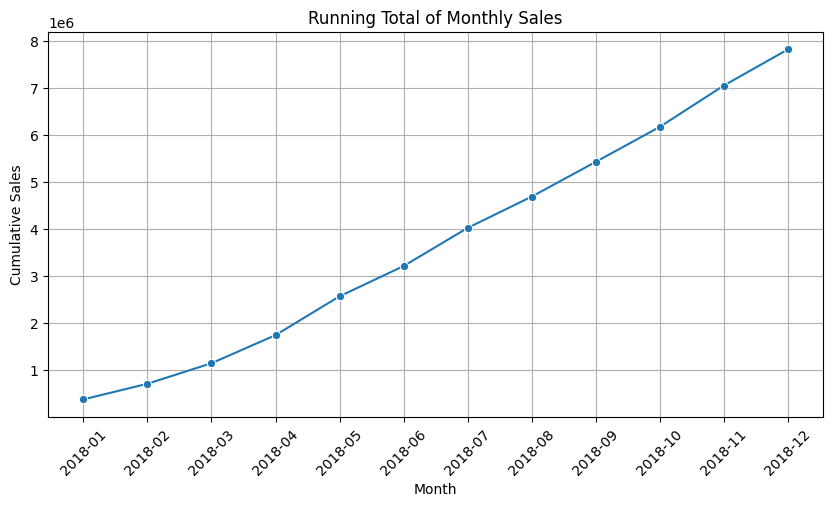

In [23]:
# Running Total of Monthly Sales
df_running_total = results["Running Total of Monthly Sales"]
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_running_total["Month"], y=df_running_total["Running_Total"], marker="o")
plt.xticks(rotation=45)
plt.title("Running Total of Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Cumulative Sales")
plt.grid(True)
plt.show()

**📌 Business Insight:**
* Sales steadily increased month-over-month, with a sharp rise in May and November.
* This suggests that certain months contribute significantly to revenue spikes.
* Marketing budgets should be allocated toward peak months.

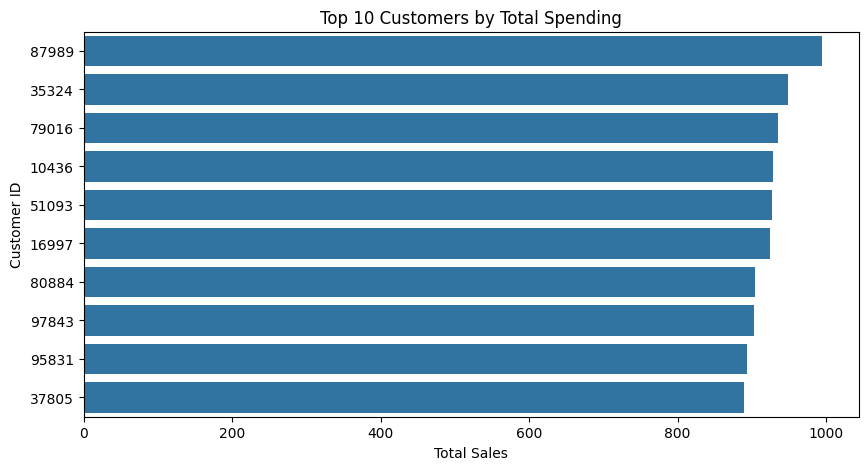

In [24]:
# Customer Segmentation by Order Volume
df_customer_segment = results["Customer Segmentation by Order Volume (Using CTE)"]
plt.figure(figsize=(10, 5))
sns.barplot(x=df_customer_segment["Total_Sales"], y=df_customer_segment["Customer_Id"].astype(str))
plt.title("Top 10 Customers by Total Spending")
plt.xlabel("Total Sales")
plt.ylabel("Customer ID")
plt.show()

**📌 Business Insight:**
* Males dominate high-spending customers—indicating a strong market segment for male-focused promotions.
* Personalized discounts should be offered to these top customers to increase retention.
* Customer loyalty programs should be introduced for repeat buyers.

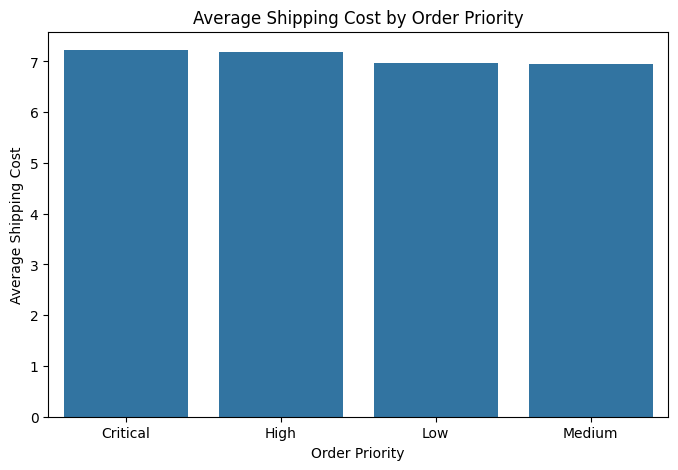

In [25]:
# Shipping Cost Analysis
df_shipping = results["Shipping Cost Analysis"]
plt.figure(figsize=(8, 5))
sns.barplot(x=df_shipping["Order_Priority"], y=df_shipping["Avg_Shipping_Cost"])
plt.title("Average Shipping Cost by Order Priority")
plt.xlabel("Order Priority")
plt.ylabel("Average Shipping Cost")
plt.show()

**📌 Business Insight:**
* Higher shipping costs are linked with Critical & High priority orders.
* Encouraging bulk orders could help reduce per-order shipping costs.
* Customers should be incentivized to choose lower-priority shipping when delivery urgency is low.

## **Business Recommendations: How to Improve E-Commerce Performance**
Based on our analysis, here are the key recommendations to help the business improve order processing, increase sales, optimize shipping, and enhance customer experience.

🚀 **Improve Order Processing & Delivery Speed**
* Make order fulfillment faster: On average, it takes 5.25 days to process an order. To speed this up:
  * Use automation to reduce manual work.
  * Improve warehouse management to cut down on delays.
  * Offer real-time order tracking to improve customer trust.
* Offer faster shipping for premium customers:
  * Since critical and high-priority orders have higher shipping costs, offer loyalty perks like free or discounted express delivery to frequent buyers.
  * Work with multiple shipping partners to find faster and cheaper options.
* Encourage bulk or scheduled orders: Give discounts on pre-orders and bulk purchases to make demand more predictable.

🚀 **Boost Sales & Maximize Revenue**
* Leverage peak sales months: Sales spike in May and November.
  * Run seasonal promotions and exclusive deals during these months.
  * Stock up on popular items in advance to avoid shortages.
* Promote top-selling products:
  * Items like T-Shirts, Watches, and Running Shoes sell the most.
  * Feature these in ads, homepage banners, and influencer promotions.
* Improve underperforming products: Reduce prices or bundle slow-moving items with popular ones.

🚀 **Identify & Retain High-Value Customers**
* Recognize and reward loyal customers:
  * The top 10 customers spend the most money—offer them personalized discounts or early access to sales.
  * Introduce a VIP or loyalty program to increase repeat purchases.
* Use targeted marketing:
  * Men tend to spend more per order—run personalized campaigns for male shoppers.
  * Offer special promotions to first-time buyers to encourage repeat purchases.

🚀 **Reduce Shipping Costs Without Hurting Delivery Speed**
* Encourage cost-effective shipping options:
  * Customers choosing "Critical" and "High-Priority" orders pay higher shipping fees.
  * Offer free standard shipping for non-urgent orders to reduce logistics costs.
* Negotiate better rates with shipping partners: Since high-priority shipping costs more, find partners that offer discounts for bulk shipping.
* Group orders for efficiency: Suggest "ship together" options for customers who place multiple orders.

🚀 **Improve Payment Flexibility & Security**
* Encourage alternative payment methods: 74% of transactions are made using credit cards—promote E-Wallets and Debit Cards with cashback offers.
* Reduce cart abandonment due to payment issues:
  * Offer Buy Now, Pay Later (BNPL) options.
  * Make the checkout process faster and more secure.

## **Conclusion: Action Plan for Growth**
* ✅ Make order processing faster with automation and better logistics.
* ✅ Boost sales by focusing on top-selling products and peak months.
* ✅ Keep loyal customers engaged with rewards and personalized offers.
* ✅ Reduce shipping costs while maintaining fast delivery.
* ✅ Improve payment flexibility to give customers more choices.

By implementing these recommendations, the e-commerce platform can increase revenue, improve customer satisfaction, and optimize logistics. 🚀

